<a href="https://colab.research.google.com/github/Hansen2024/GB_656/blob/main/GB_656_Assg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GB 656 Assignment 1 ---Zihao Li**

In [ ]:
# Load the appropriate libraries.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
#To make the data available, you can clone my github repository into your colab notebook:
!git clone https://github.com/Hansen2024/GB_656

fatal: destination path 'GB_656' already exists and is not an empty directory.


In [ ]:
#you should see `GB_656` listed. And we can pull the data from there:
!ls

GB_656	sample_data


In [ ]:
#Read the tel.csv file and check the varibales
Tel_data = pd.read_csv('GB_656/tel.csv')
Tel_data.head(5)

# **Run a regression of Hours on all of the variables**


In [ ]:
#Getting all the variable and input into X1 and y and try to start a linearRegression
X1 = Tel_data[['ByDa','RWT','SOA','SOB','SOC','Field','Hot','Day']]
y = Tel_data['Hours']

In [ ]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(X1, y)
print(model1.intercept_)
print(model1.coef_)
print(model1.score(X1,y))

66.56766981061251
[-0.14479456  0.33042079  0.06501266 -0.19096699  0.24517713  0.16304945
  1.31370942 -2.52554691]
0.7045944710614257


# **What I found**
1. ByDa, SOB, Day have a negative relationship to the hour and rest variables have a positive relationship to the hour.
2. 0.7 R2 means that 70% of the changing in the dependent variable can be explained by the independent variables included in this model. But it is not a high valuable number.

### **Include an additional variable that indicated whether the Day is Friday.**

In [ ]:
#Adding a new coloum into the data which to check is that day is Friday or not
Tel_data['Day_F'] = np.where(Tel_data['Day'] == 5, 1, 0)

### **Rerun regression**

In [ ]:
#Making a new linearRegresion and Getting all the variable and input into X2 and y and try to see changing of the Coef and R2
X2 = Tel_data[['ByDa','RWT','SOA','SOB','SOC','Field','Hot','Day','Day_F']]

In [ ]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(X2, y)
print(model1.intercept_)
print(model1.coef_)
print(model1.score(X2, y))

72.58088195600047
[ -0.04155124   0.14135825   0.04507252  -0.64707613   0.17930746
   0.09568749   0.91746694   2.41576663 -30.70285627]
0.8339606166054786


(array([1., 1., 5., 2., 4., 5., 2., 1., 6., 4.]),
 array([-15.01896926, -12.37149944,  -9.72402963,  -7.07655981,
         -4.42908999,  -1.78162017,   0.86584965,   3.51331946,
          6.16078928,   8.8082591 ,  11.45572892]),
 <BarContainer object of 10 artists>)

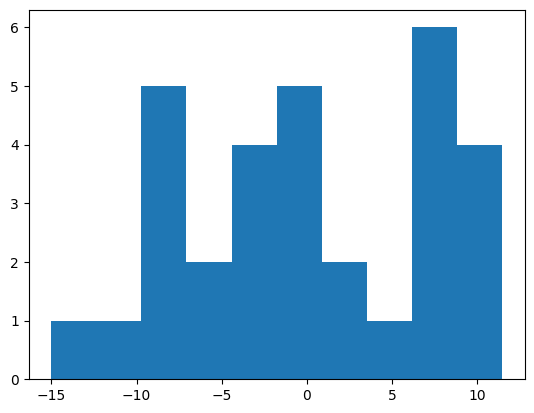

In [ ]:
#Check the residual
ypred = model1.predict(X2)
eps = y - ypred
plt.hist(eps)

# **Run a backward selection to find the best model.**

In [ ]:
#Keep trying to build a new regression try to find a better model with higher R2
X3 = Tel_data[['ByDa','RWT','SOA','SOB','SOC','Field','Day','Day_F']]

In [ ]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(X3, y)
print(model1.intercept_)
print(model1.coef_)
print(model1.score(X3, y))

83.76538401345644
[ 1.94724609e-02  6.30086945e-02  4.32674231e-02 -4.85674896e-01
  5.95612542e-03  1.11978793e-01  2.68202092e+00 -3.58421797e+01]
0.7838214395308734


(array([3., 5., 1., 3., 3., 5., 6., 4., 0., 1.]),
 array([-15.34892713, -12.0114678 ,  -8.67400846,  -5.33654913,
         -1.99908979,   1.33836954,   4.67582888,   8.01328821,
         11.35074755,  14.68820689,  18.02566622]),
 <BarContainer object of 10 artists>)

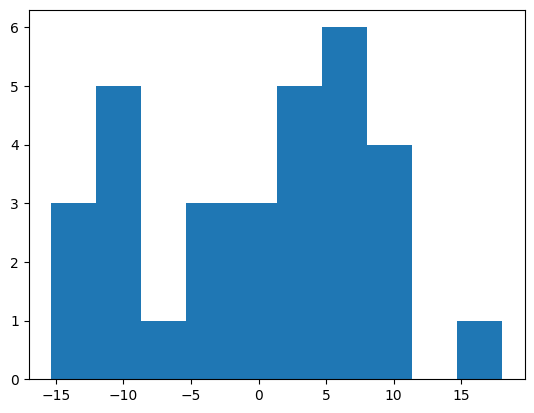

In [ ]:
#check the residuals.
ypred = model1.predict(X3)
eps = y - ypred
plt.hist(eps)

# **What I found (Summary)**

I found the following regression model is the best compared to the others I found.

I first try to based on the P-Value to delete each independent variable with the highest p-Value and compare which one has a higher R2 number than the "Full" Model but there is not one, So I turned comparing P-Value into Adjusted R2 which is a better metric than R2. and after comapring each model I have, the following model has the highest Adjusted R2 and also have a closed R2 to the "Full" model. So this is the reason I believe this is the best model. And then, after chcking the residual, it also has a low residuals compare to the "full" model and the previous model.

Through this link you can find a xls file named in "GB 656 Assg 1 data base.xls" which is the one I used to do the regression and comapring the p-Value and deleted each highest P-values. https://github.com/Hansen2024/GB_656

In [ ]:
##Keep trying to build a new regression try to find a better model with higher R2
X4 = Tel_data[['Hot','RWT','SOA','Day','Day_F']]
model1 = LinearRegression(fit_intercept=True)
model1.fit(X4, y)
print(model1.intercept_)
print(model1.coef_)
print(model1.score(X4, y))

74.44552703824256
[  0.81950275   0.11363037   0.04197853   2.44164367 -30.49523016]
0.8224126922861862


(array([2., 3., 2., 3., 3., 3., 5., 2., 5., 3.]),
 array([-14.71453717, -11.9768674 ,  -9.23919762,  -6.50152784,
         -3.76385806,  -1.02618828,   1.7114815 ,   4.44915128,
          7.18682105,   9.92449083,  12.66216061]),
 <BarContainer object of 10 artists>)

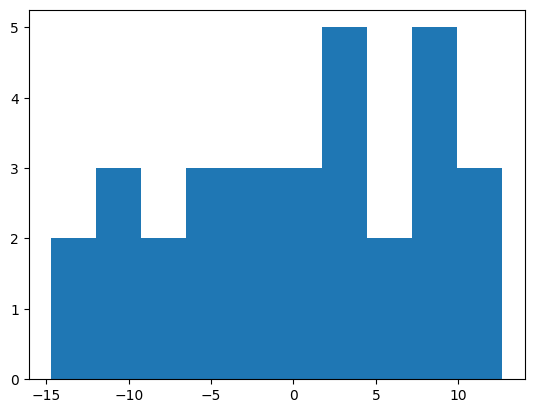

In [ ]:
#Check the residuals
ypred = model1.predict(X4)
eps = y - ypred
plt.hist(eps)